# 라이브러리 로드

In [28]:
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 로드

In [32]:
# google trend
google_trend_dic = {}
for file in os.listdir(r'trend_dataset\google_trend'):

    single_google_trend_df = pd.read_csv(f'trend_dataset\google_trend\{file}', index_col=0).reset_index(drop=True)
    single_google_trend_df['date'] = pd.to_datetime(single_google_trend_df['date'])
    
    google_trend_dic[file.split('_')[0]] = single_google_trend_df

google_trend_dic.keys()

dict_keys(['aespa', 'BLACKPINK', 'BTS', 'IVE', 'NCT DREAM', 'NewJeans', 'SEVENTEEN', 'Stray Kids', 'TOMORROW X TOGETHER', 'TWICE'])

In [33]:
# naver trend
naver_trend_dic = {}
for file in os.listdir(r'trend_dataset\naver_trend'):

    naver_trend_df = pd.read_csv(rf'trend_dataset\naver_trend\{file}', index_col=0).reset_index().rename(columns={'period' : 'date', 'AESPA' : 'aespa', 'NEWJEANS' : 'NewJeans', 'TXT' : 'TOMORROW X TOGETHER'})
    naver_trend_df['date'] = pd.to_datetime(naver_trend_df['date'])

    for artist in naver_trend_df.columns[1:]:
        naver_trend_dic[artist] = naver_trend_df[['date', artist]].rename(columns={artist : 'trend'})

naver_trend_dic.keys()

dict_keys(['BTS', 'NCT DREAM', 'SEVENTEEN', 'Stray Kids', 'TOMORROW X TOGETHER', 'aespa', 'BLACKPINK', 'IVE', 'NewJeans', 'TWICE'])

In [ ]:
# 아티스트 앨범 정보

# 시계열 분해

In [29]:
boy_group = ['SEVENTEEN', 'BTS', 'Stray Kids', 'NCT DREAM', 'TOMORROW X TOGETHER']
girl_group = ['IVE', 'aespa', 'NewJeans', 'TWICE', 'BLACKPINK']

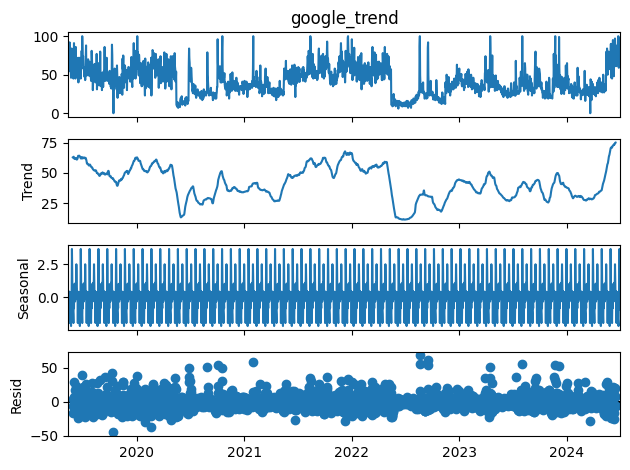

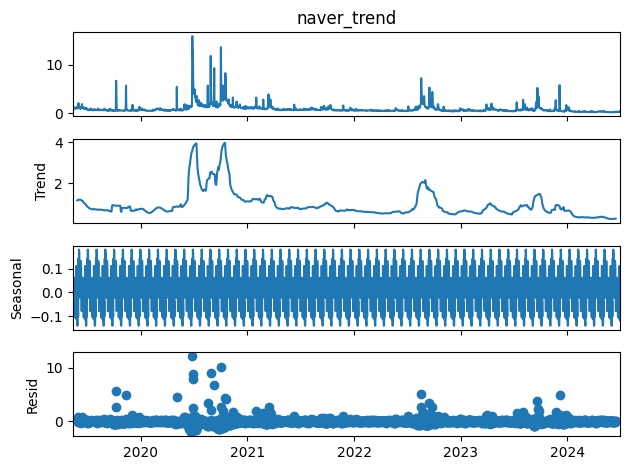

In [46]:
bts_df = pd.merge(google_trend_dic['BLACKPINK'], naver_trend_dic['BLACKPINK'], how='inner', on='date').rename(columns={'trend_x':'google_trend', 'trend_y':'naver_trend'}).set_index('date')

result = seasonal_decompose(bts_df['google_trend'], model='addictive', period=30)
result.plot()

result = seasonal_decompose(bts_df['naver_trend'], model='addictive', period=30)
result.plot()

plt.show()